# Medical Health Insurance Cost Analysis and Prediction

### Objective :
To determine the annual insurance premium (amount paid every month) offered to the customer.

### Dataset Source :
[Kaggle](https://www.kaggle.com/)

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading and Exploring the Data

In [2]:
# importing dataset
data = pd.read_csv('Health_insurance.csv')
data.describe()

,age,bmi,children,charges
count,1718.000000,1718.000000,1718.000000,1718.000000
mean,38.770664,30.501059,1.076834,12705.486673
std,13.784168,5.849464,1.202274,11852.858315
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.220000,0.000000,4435.094200
50%,38.000000,30.030000,1.000000,8649.366175
75%,50.000000,34.400000,2.000000,15597.942200
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
# checking the dimensions of the dataframe
data.shape

(1718, 7)

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# Checking number of unique elements in the columns
data.nunique()

age           47
sex            2
bmi          557
children       6
smoker         2
region         4
charges     1344
dtype: int64

In [6]:
# Checking how much memory each column uses in bytes
data.memory_usage()

Index         132
age         13744
sex         13744
bmi         13744
children    13744
smoker      13744
region      13744
charges     13744
dtype: int64

In [7]:
# Checking type and value count of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1718 non-null   int64  
 1   sex       1718 non-null   object 
 2   bmi       1718 non-null   float64
 3   children  1718 non-null   int64  
 4   smoker    1718 non-null   object 
 5   region    1718 non-null   object 
 6   charges   1718 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 94.1+ KB


In [8]:
# Column Children should be object column
# Converting children from numerical to categorical columns
data['children'] = data['children'].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1718 non-null   int64  
 1   sex       1718 non-null   object 
 2   bmi       1718 non-null   float64
 3   children  1718 non-null   object 
 4   smoker    1718 non-null   object 
 5   region    1718 non-null   object 
 6   charges   1718 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 94.1+ KB


In [9]:
# Displaying the statistical aspects of the dataframe
data.describe()

,age,bmi,charges
count,1718.000000,1718.000000,1718.000000
mean,38.770664,30.501059,12705.486673
std,13.784168,5.849464,11852.858315
min,18.000000,15.960000,1121.873900
25%,27.000000,26.220000,4435.094200
50%,38.000000,30.030000,8649.366175
75%,50.000000,34.400000,15597.942200
max,64.000000,53.130000,63770.428010


# Data Visualization - Univariate Analysis

In [10]:
# Displaying Numerical Columns
no_of_nonobject_cols = data.select_dtypes(exclude = 'object')
no_of_nonobject_cols.columns

Index(['age', 'bmi', 'charges'], dtype='object')

In [11]:
# Displaying Categorical Columns
no_of_objects_cols = data.select_dtypes(include = 'object')
no_of_objects_cols.columns

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

<Figure size 1500x600 with 0 Axes>

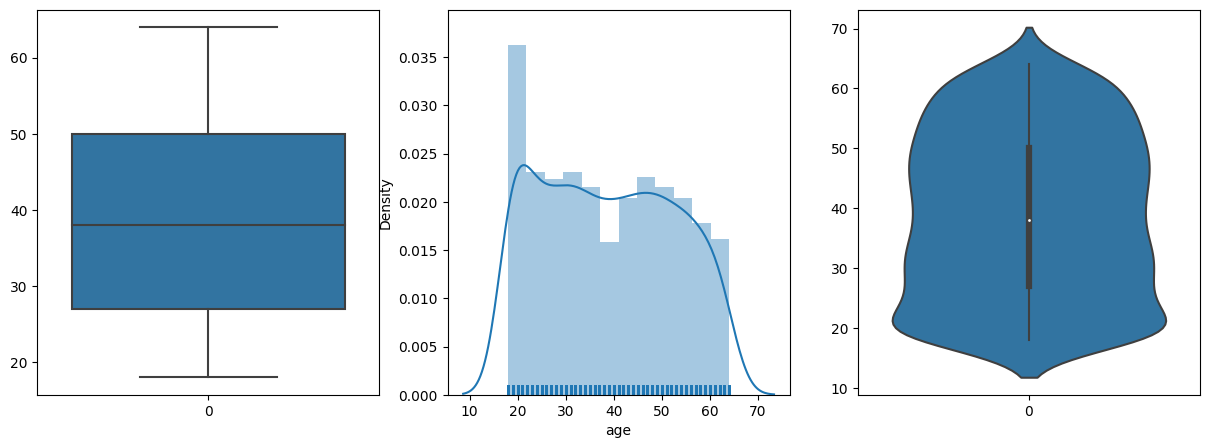

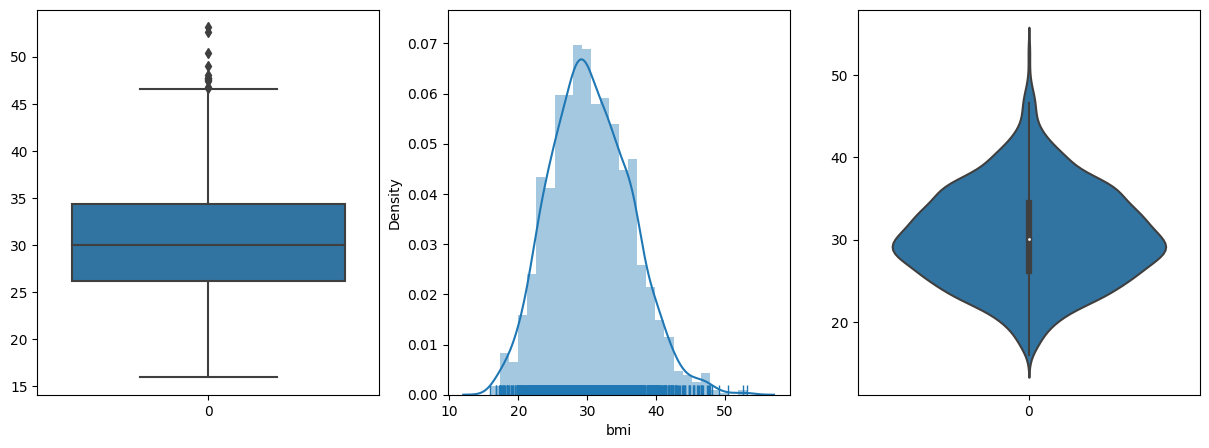

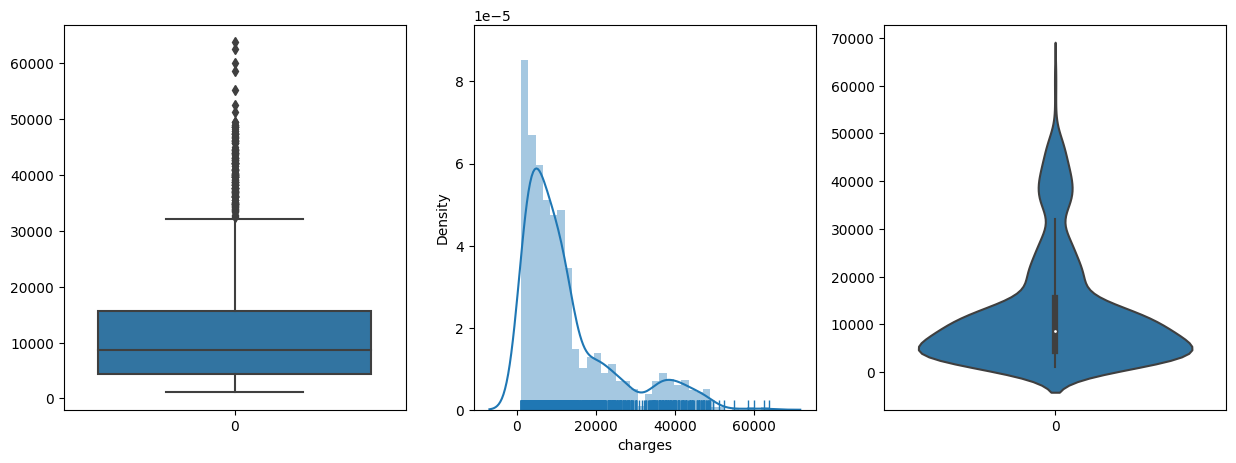

In [12]:
# Displaying different plots for visualizing the distribution, central tendency, 
# spread, and shape of the data within each respect to each numerical column.

plt.figure(figsize = (15,6))
f_num = no_of_nonobject_cols.columns[:]

for i in enumerate(f_num):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(no_of_nonobject_cols[i[1]])

    ax1 = f.add_subplot(132)
    sns.distplot(no_of_nonobject_cols[i[1]], rug = True)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(no_of_nonobject_cols[i[1]], orient= 'vertical')
    
    plt.show()

Displaying different plots for visualizing the distribution, central tendency, spread, and shape of the data within each respect to each numerical column.

<Figure size 1500x1000 with 0 Axes>

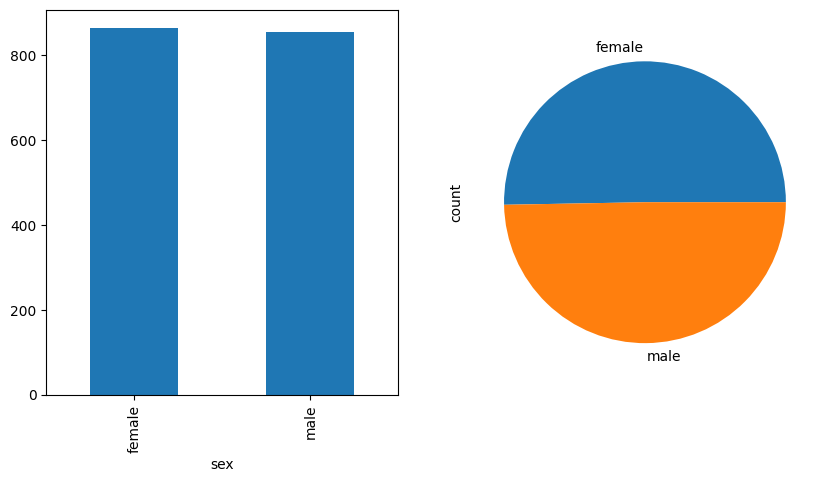

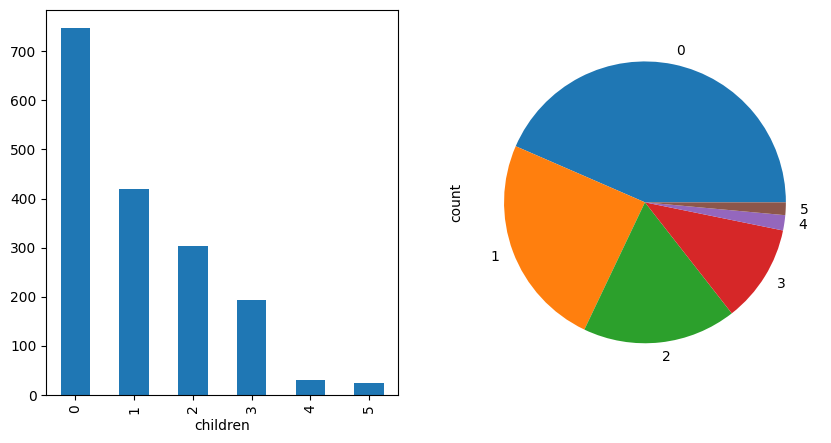

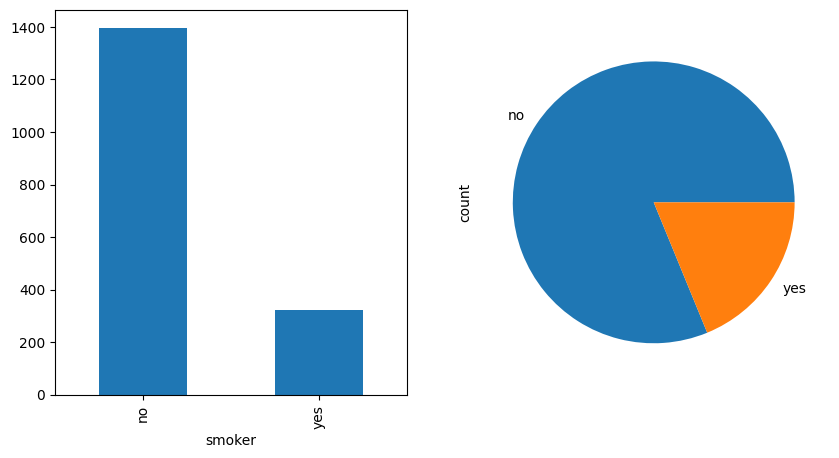

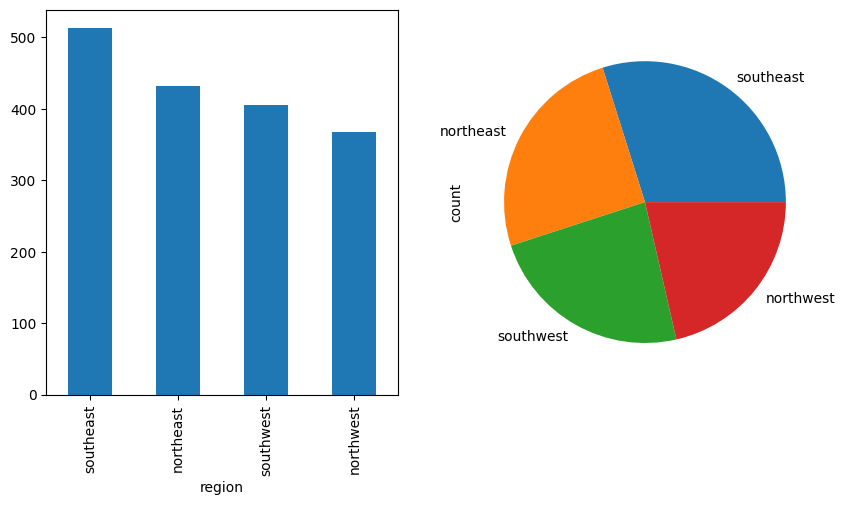

In [13]:
# Displaying distribution and proportion of categories within each categorical column

plt.figure(figsize = (15,10))
f_cat = no_of_objects_cols.columns[:]
for i in enumerate(f_cat):
    
    f = plt.figure(figsize=(10,5))
    ax = f.add_subplot(121)
    no_of_objects_cols[i[1]].value_counts().plot.bar()

    ax1 = f.add_subplot(122)
    no_of_objects_cols[i[1]].value_counts().plot.pie()
    
    plt.show()

Displaying distribution and proportion of categories within each categorical column

# Outlier detection

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
for i in no_of_nonobject_cols.columns:
    print(i)
    print(no_of_nonobject_cols[i].quantile([0.1,0.9,0.95,0.99]))
    print('\n')
    
# 0.1 and 0.9 Quantiles: 
# These capture the range within which most of the data lies (90% between them). 
# Values outside this range might indicate potential outliers.

# 0.95 and 0.99 Quantiles: 
# These percentiles represent higher thresholds. 
# Values significantly beyond these quantiles could be considered as extreme outliers.

age
0.10    20.0
0.90    58.0
0.95    61.0
0.99    64.0
Name: age, dtype: float64


bmi
0.10    23.1800
0.90    38.0600
0.95    40.3000
0.99    45.8388
Name: bmi, dtype: float64


charges
0.10     2253.608250
0.90    33985.165500
0.95    40295.451540
0.99    47922.719429
Name: charges, dtype: float64




# Data Analysis - Bivariate Analysis

<Figure size 1500x800 with 0 Axes>

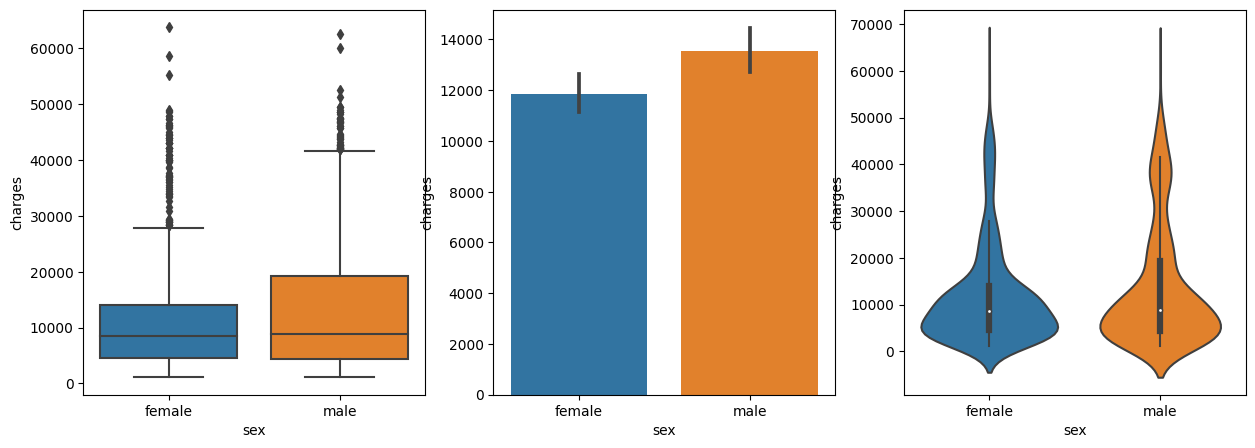

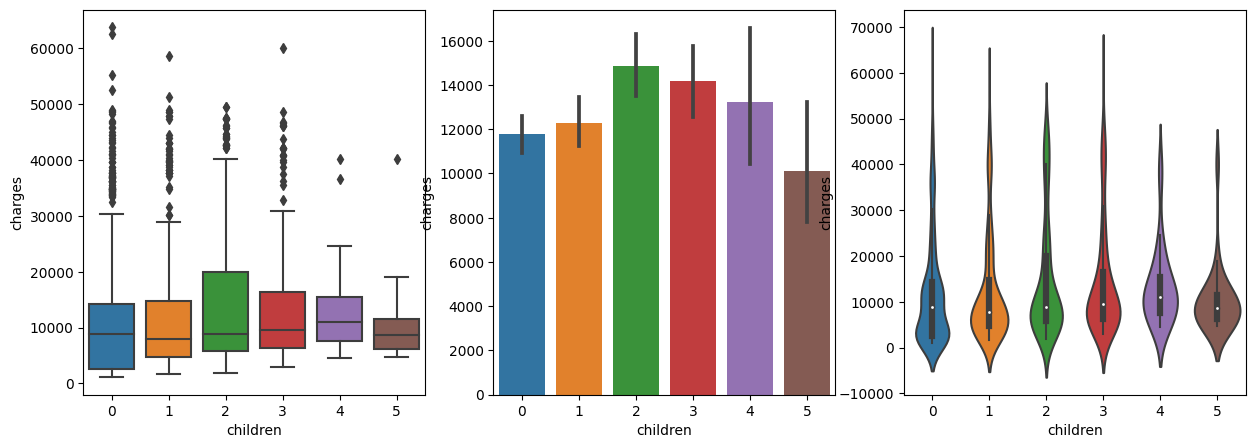

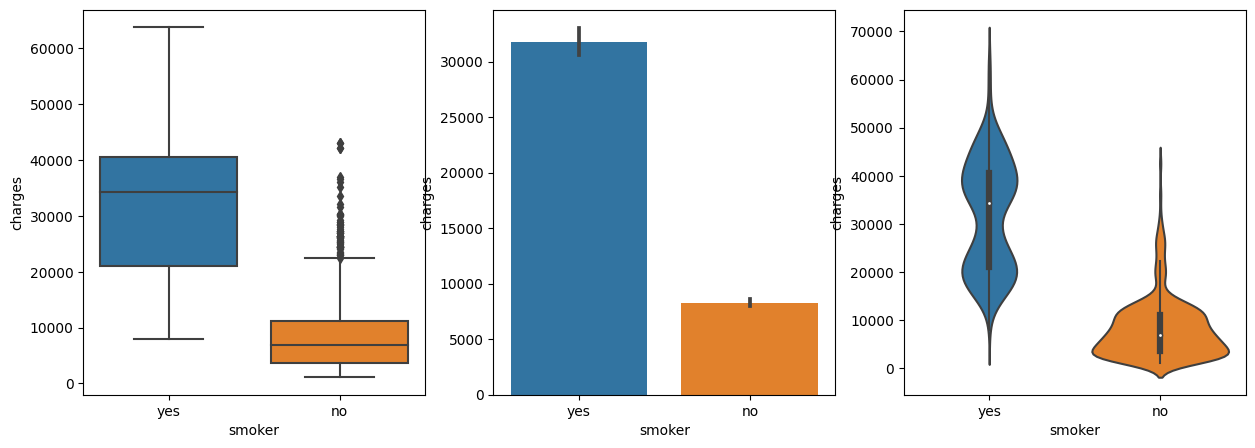

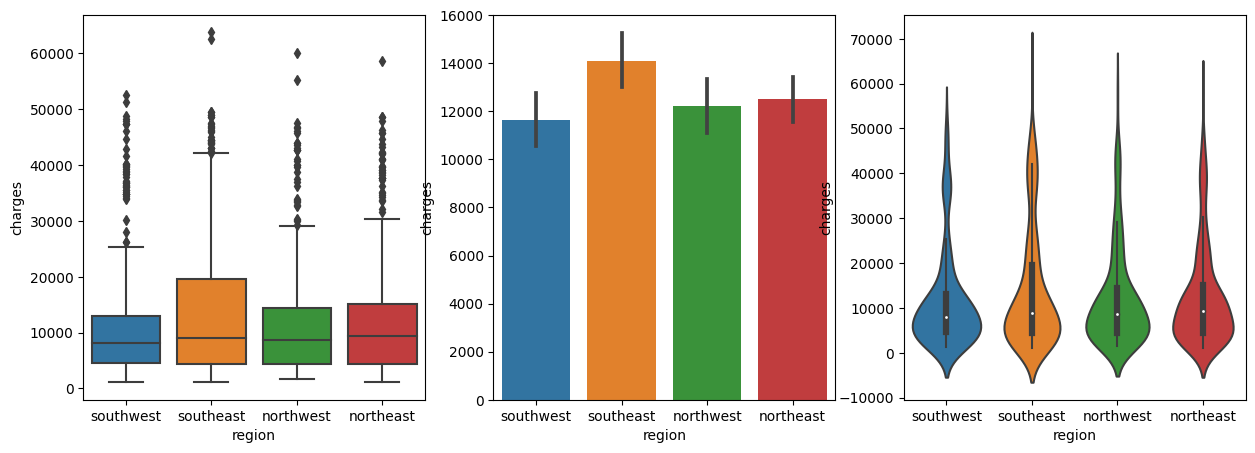

In [16]:
# Bivariate analysis of categorical columns w.r.t. target column expenses
# Displaying how column charges varies concerning different categorical features.

plt.figure(figsize = (15,8))
f_cat = no_of_objects_cols.columns[:]

for i in enumerate(f_cat):
    f = plt.figure(figsize=(15,5))
    ax = f.add_subplot(131)
    sns.boxplot(x = no_of_objects_cols[i[1]], y= data.charges)

    ax1 = f.add_subplot(132)
    sns.barplot(x = no_of_objects_cols[i[1]], y= data.charges)
    
    ax2 = f.add_subplot(133)
    sns.violinplot(x = no_of_objects_cols[i[1]], y= data.charges, orient= 'vertical')
    
    plt.show()

Displaying how Charges varies with Sex, Children, Smoker and Region.

# Target Variable - Charges

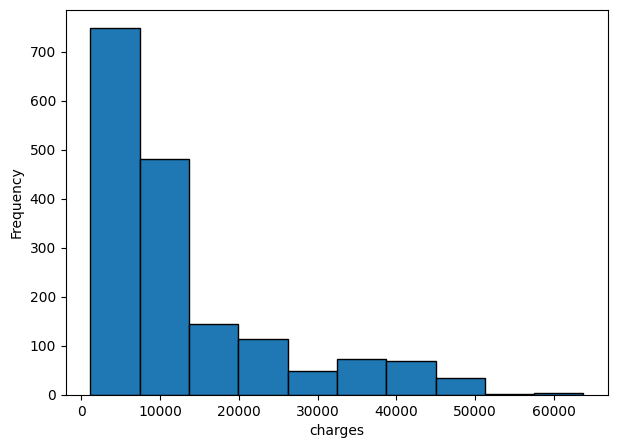

In [17]:
# Plotting histogram

plt.figure(figsize = (7,5))
plt.hist(data['charges'], edgecolor = 'black')
plt.xlabel('charges')
plt.ylabel('Frequency')
plt.show()

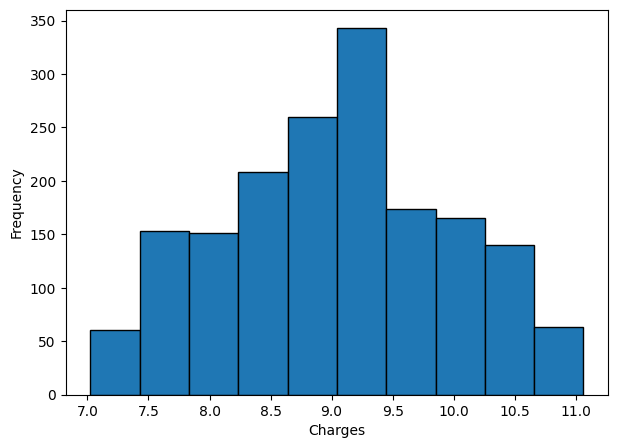

In [18]:
# Note: The distribution of the charges is skewed to the right, 
# so we applied natural log for ~ normal distribution.

# # Using log Transformation
temp = np.log1p(data['charges'])

plt.figure(figsize = (7,5))
plt.hist(temp, edgecolor = 'black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

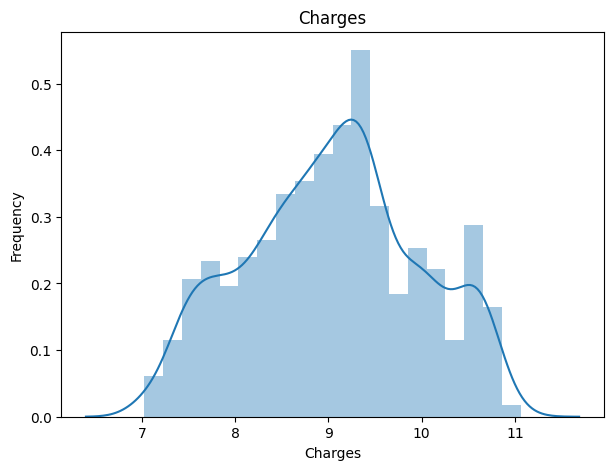

In [19]:
# Distribution of errors

plt.figure(figsize = (7,5))
p = sns.distplot(temp,kde=True)
p = plt.title('Charges')
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

# Data Visualization - Pairplot & Heatmap

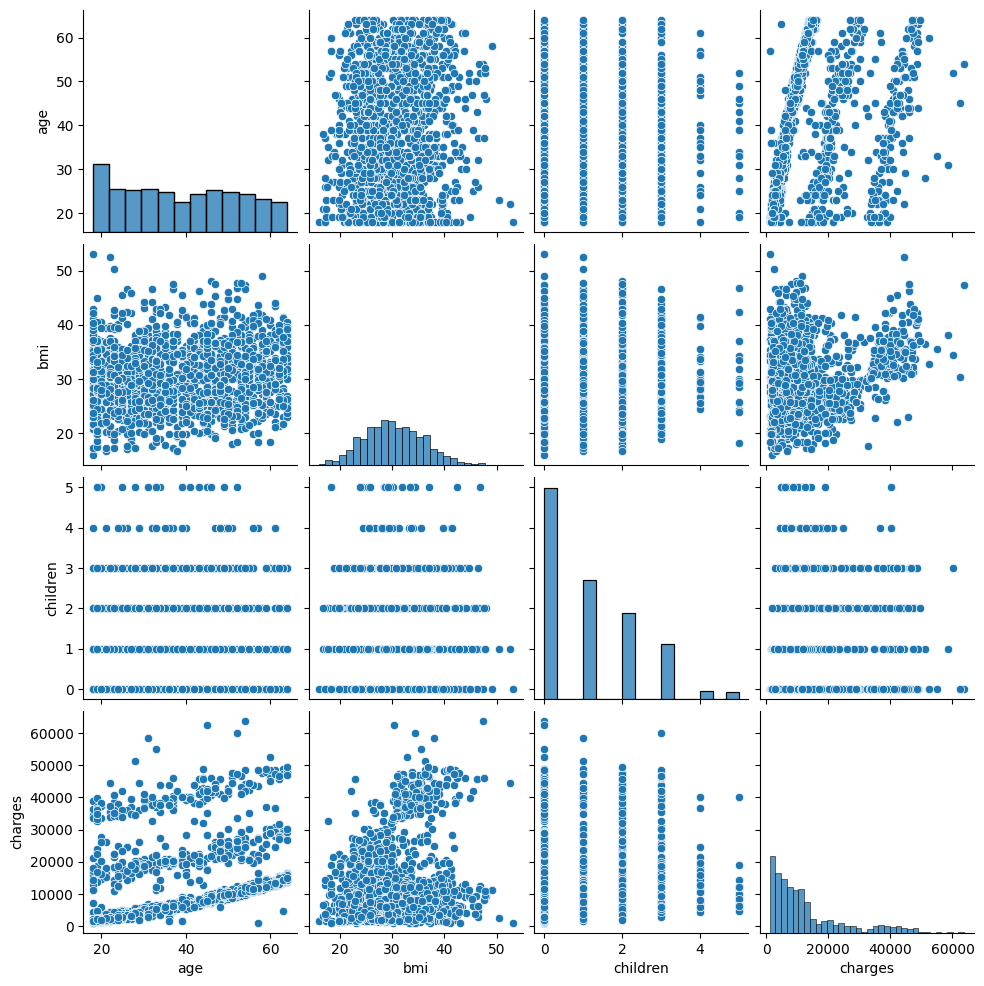

In [20]:
# pairplot heatmap

sns.pairplot(data)
plt.show()

### Conclusion : The pairplot reveals that there is a linear relationship between age with charges

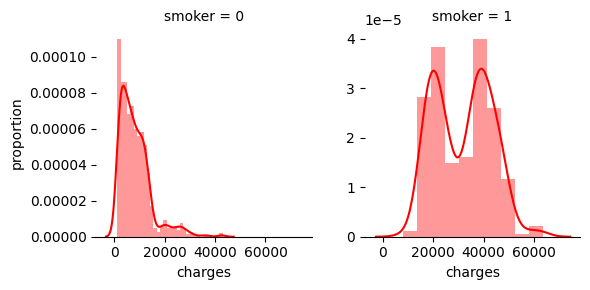

In [47]:
g = sns.FacetGrid(data, col="smoker", sharey=False, sharex = True)
g.map(sns.distplot, "charges", color = 'r');
g.set_axis_labels("charges", "proportion");
g.despine(left=True)

In [56]:

# ax = sns.distplot(data["age"], color = 'purple')
# sns.catplot(x="smoker", kind="count", hue = 'sex', data = data , palette='pastel');
# plt.show()
# sns.lmplot(x="age", y="charges", hue="smoker", data=data, palette=dict(yes="r", no="g"))
# ax.set_title('Smokers and non-smokers')
# plt.show()

In [21]:
# Column region
# Dividing region into - Norteast, Nortwest, Southeast and Southwest

region_dummies = pd.get_dummies(data.region)
data = pd.concat([data, region_dummies], axis = 1)
data=data.drop('region', axis=1)
data.head() 

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,False,False,False,True
1,18,male,33.770,1,no,1725.55230,False,False,True,False
2,28,male,33.000,3,no,4449.46200,False,False,True,False
3,33,male,22.705,0,no,21984.47061,False,True,False,False
4,32,male,28.880,0,no,3866.85520,False,True,False,False


In [22]:
# Rounding off charges to 2 decimal places

data['charges'] = round(data['charges'],2)
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92,False,False,False,True
1,18,male,33.770,1,no,1725.55,False,False,True,False
2,28,male,33.000,3,no,4449.46,False,False,True,False
3,33,male,22.705,0,no,21984.47,False,True,False,False
4,32,male,28.880,0,no,3866.86,False,True,False,False


In [23]:
# Providing numerical representation to the categorical data using Label Ecoder

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['sex'] = LE.fit_transform(data['sex'])
data['smoker'] = LE.fit_transform(data['smoker'])
# data['region'] = LE.fit_transform(data['region'])
data['northwest'] = LE.fit_transform(data['northwest'])
data['northeast'] = LE.fit_transform(data['northeast'])
data['southeast'] = LE.fit_transform(data['southeast'])
data['southwest'] = LE.fit_transform(data['southwest'])

In [24]:
data.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92,0,0,0,1
1,18,1,33.770,1,0,1725.55,0,0,1,0
2,28,1,33.000,3,0,4449.46,0,0,1,0
3,33,1,22.705,0,0,21984.47,0,1,0,0
4,32,1,28.880,0,0,3866.86,0,1,0,0


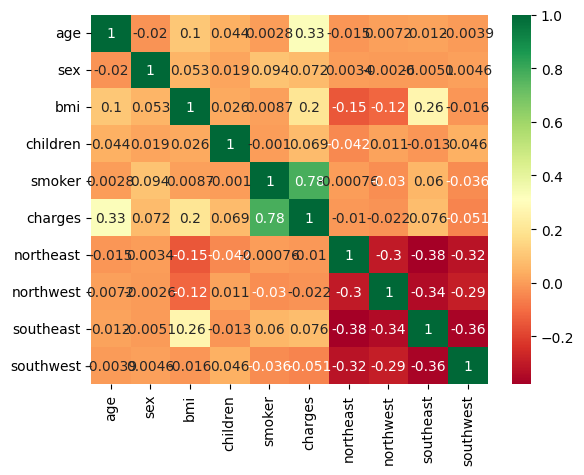

In [25]:
sns.heatmap(data.corr(), cmap= 'RdYlGn', annot = True)
plt.show()

### Conclusion : This reveals that smoking behavior, followed by age and bmi, are greatly correlated with medical charges.

# Preparing Data for Machine Learning

In [26]:
# Separating target feature - charges
X = data.drop(['charges'], axis = 1)
y = data['charges']

In [27]:
# imporing libraries for train-test splitting and Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.1, random_state= 12)

# Feature Scaling using Standard Scalar
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = y_train.values.reshape(-1, 1)
y_train = scaler.fit_transform(y_train)
y_test = y_test.values.reshape(-1, 1) 
y_test = scaler.transform(y_test)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1546, 9)
(172, 9)
(1546, 1)
(172, 1)


# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lr = LinearRegression()
linear_regression = lr.fit(X_train, y_train)
linear_regression
y_pred = linear_regression.predict(X_train)

MSE_train = metrics.mean_squared_error(y_train,y_pred)
r1_score = metrics.r2_score(y_train, y_pred)

print(f'R2 score train = {r1_score}')
print(f'MSE train = {MSE_train}')
y_test_pred = linear_regression.predict(X_test)
MSE_test_linear_regression = metrics.mean_squared_error(y_test,y_test_pred)
r2_score_test_lin = metrics.r2_score(y_test, y_test_pred)

print(f'R2 score test = {r2_score_test_lin}')
print(f'MSE test = {MSE_test_linear_regression}')

R2 score train = 0.7387583811157891
MSE train = 0.2612416188842108
R2 score test = 0.7024295501114055
MSE test = 0.30855655590136066


In [30]:
# import pickle
# import sklearn.externals as extjoblib
import joblib
linear_regression = lr.fit(X, y)
joblib.dump(linear_regression, './model/premium_prediction_model.pkl')
premium_pred_model = joblib.load('./model/premium_prediction_model.pkl')

In [31]:
from sklearn.model_selection import cross_val_score
lr_cv = cross_val_score(LinearRegression(), X, y, cv = 7)
print("Accuracy: {:.2} (+/- {:.2})".format(lr_cv.mean(), lr_cv.std() * 2))

Accuracy: 0.73 (+/- 0.074)


# Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

X_poly =  PolynomialFeatures(degree = 2).fit_transform(X)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_poly, y, test_size=0.1, random_state=12)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.fit_transform(X_test1)
y_train1 = y_train1.values.reshape(-1, 1)
y_train1 = scaler.fit_transform(y_train1)
y_test1 = y_test1.values.reshape(-1, 1) 
y_test1 = scaler.transform(y_test1)

In [33]:
pr = LinearRegression().fit(X_train1, y_train1)

pr_train_pred = pr.predict(X_train1)
pr_test_pred = pr.predict(X_test1)

pr_train_mse = metrics.mean_squared_error(y_train1,pr_train_pred)
pr_test_mse = metrics.mean_squared_error(y_test1,pr_test_pred)


print('MSE train data: {:.5}, MSE test data: {}'.format(pr_train_mse, pr_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(pr_train_mse)),
    np.sqrt(np.absolute(pr_train_mse))))

print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    metrics.r2_score(y_train1,pr_train_pred),
    metrics.r2_score(y_test1,pr_test_pred)))

MSE train data: 0.24938, MSE test data: 1.6120006875296464e+24
RMSE train data: 0.49938, RMSE test data: 0.49938
R2 train data: 0.75062, R2 test data: -1.5546e+24


In [34]:
from sklearn.model_selection import cross_val_score

pr_cv = cross_val_score(LinearRegression(), X_poly, y, cv = 7)
print("Accuracy: {:.2} (+/- {:.2})".format(pr_cv.mean(), pr_cv.std() * 2))

Accuracy: 0.78 (+/- 0.14)


# Linear Regression using Lasso

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  # You can set the alpha (regularization parameter) as needed

lasso.fit(X_train, y_train)

lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

lasso_train_mse = metrics.mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse = metrics.mean_squared_error(y_test, lasso_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(lasso_train_mse, lasso_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(lasso_train_mse)),
    np.sqrt(np.absolute(lasso_train_mse))))

print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    metrics.r2_score(y_train, lasso_train_pred),
    metrics.r2_score(y_test, lasso_test_pred)))


MSE train data: 0.29443, MSE test data: 0.34589
RMSE train data: 0.54262, RMSE test data: 0.54262
R2 train data: 0.70557, R2 test data: 0.66642


In [36]:
lasso_cv = cross_val_score(Lasso(alpha=0.1), X, y, cv=7)  # You can use the same alpha as set earlier
print("Accuracy: {:.2} (+/- {:.2})".format(lasso_cv.mean(), lasso_cv.std() * 2))


Accuracy: 0.73 (+/- 0.074)


# Linear Regression using Ridge


In [37]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

ridge = Ridge(alpha=1.0)  # You can adjust alpha for regularization strength

ridge.fit(X_train, y_train)

ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse = mean_squared_error(y_test, ridge_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(ridge_train_mse, ridge_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(ridge_train_mse)),
    np.sqrt(np.absolute(ridge_test_mse))))

print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, ridge_train_pred),
    r2_score(y_test, ridge_test_pred)))

MSE train data: 0.26124, MSE test data: 0.30853
RMSE train data: 0.51112, RMSE test data: 0.55545
R2 train data: 0.73876, R2 test data: 0.70246


In [38]:
ridge_cv = cross_val_score(Ridge(alpha=1.0), X, y, cv=7)
print("Accuracy: {:.2} (+/- {:.2})".format(ridge_cv.mean(), ridge_cv.std() * 2))

Accuracy: 0.73 (+/- 0.073)


# Decision Tree Regression


In [39]:
from sklearn.tree import DecisionTreeRegressor

# Creating and fitting the Decision Tree Regressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)

# Predictions on the training and test set
dtr_train_pred = dtr.predict(X_train)
dtr_test_pred = dtr.predict(X_test)

# Calculating MSE for training and test sets
dtr_train_mse = mean_squared_error(y_train, dtr_train_pred)
dtr_test_mse = mean_squared_error(y_test, dtr_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(dtr_train_mse, dtr_test_mse))

# Calculating RMSE for training and test sets
print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(dtr_train_mse)),
    np.sqrt(np.absolute(dtr_test_mse))))

# Calculating R2 score for training and test sets
print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, dtr_train_pred),
    r2_score(y_test, dtr_test_pred)))

MSE train data: 0.0051483, MSE test data: 0.27831
RMSE train data: 0.071752, RMSE test data: 0.52755
R2 train data: 0.99485, R2 test data: 0.7316


In [40]:
dtr_cv = cross_val_score(DecisionTreeRegressor(), X_poly, y, cv=7)
print("Accuracy: {:.2} (+/- {:.2})".format(dtr_cv.mean(), dtr_cv.std() * 2))

Accuracy: 0.72 (+/- 0.13)


# MLP - Multi Layer Perceptron 

In [41]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(30, 30, 30))
mlp.fit(X_train, y_train)

mpl_train_predictions = mlp.predict(X_train)
mlp_test_predictions = mlp.predict(X_test)

mlp_train_mse = mean_squared_error(y_train, ridge_train_pred)
mlp_test_mse = mean_squared_error(y_test, ridge_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(
    ridge_train_mse, ridge_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(ridge_train_mse)),
    np.sqrt(np.absolute(ridge_test_mse))))

print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, ridge_train_pred),
    r2_score(y_test, ridge_test_pred)))

MSE train data: 0.26124, MSE test data: 0.30853
RMSE train data: 0.51112, RMSE test data: 0.55545
R2 train data: 0.73876, R2 test data: 0.70246


In [46]:

mlp_cv = cross_val_score(MLPRegressor(hidden_layer_sizes=(30, 30, 30)), X_poly, y, cv = 7)
print("Accuracy: {:.2} (+/- {:.2})".format(mlp_cv.mean(), mlp_cv.std() * 2))

Accuracy: 0.79 (+/- 0.12)


# KNN

In [43]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

knn_train_predictions = knn.predict(X_train)
knn_test_predictions = knn.predict(X_test)

knn_train_mse = mean_squared_error(y_train, ridge_train_pred)
knn_test_mse = mean_squared_error(y_test, ridge_test_pred)

print('MSE train data: {:.5}, MSE test data: {:.5}'.format(
    ridge_train_mse, ridge_test_mse))

print('RMSE train data: {:.5}, RMSE test data: {:.5}'.format(
    np.sqrt(np.absolute(ridge_train_mse)),
    np.sqrt(np.absolute(ridge_test_mse))))

print('R2 train data: {:.5}, R2 test data: {:.5}'.format(
    r2_score(y_train, ridge_train_pred),
    r2_score(y_test, ridge_test_pred)))

MSE train data: 0.26124, MSE test data: 0.30853
RMSE train data: 0.51112, RMSE test data: 0.55545
R2 train data: 0.73876, R2 test data: 0.70246


In [44]:
from sklearn.metrics import accuracy_score
predictions_rounded = np.round(knn_test_predictions)
y_test_rounded = np.round(y_test)
accuracy = accuracy_score(y_test_rounded, predictions_rounded)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


# SVM - Support Vector Machice

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

svr = SVR()
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }
svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train, y_train.ravel())

svr = SVR(C=10, gamma=0.1, tol=0.0001)
svr.fit(X_train, y_train.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

cv_svr = svr_grid.best_score_
y_pred_svr_train = svr.predict(X_train)
r2_score_svr_train = r2_score(y_train, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test)
r2_score_svr_test = r2_score(y_test, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

Fitting 10 folds for each of 60 candidates, totalling 600 fits


SVR(C=10, gamma=0.01, tol=0.0001)
0.8085620616265802
CV : 0.809
R2_score (train) : 0.837
R2 score (test) : 0.763
RMSE : 0.496


# Conclusion

Models & Accuracy

1) Linear Regression : 0.73
2) Linear Regression using Lasso : 0.73
3) Linear Regression using Ridge : 0.73
4) Polynomial Regression : 0.77
5) Decision Tree Regression : 0.71
6) KNN : 0.76
7) MLP : 0.79
8) SVM : 0.80


###  Best Model : MLP AND SVM